In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
# Read CSV File 
df = pd.read_csv("missingvalue.csv")

In [40]:
# To Show Entire Data Frame
df

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,female,72,72,74.0,78.0,1,Pune
1,female,69,90,88.0,NaN,2,na
2,female,90,95,93.0,74.0,2,Nashik
3,male,47,57,NaN,78.0,1,Na
4,male,na,78,75.0,81.0,3,Pune
5,female,71,Na,78.0,70.0,4,na
6,male,12,44,52.0,12.0,2,Nashik
7,male,NaN,65,67.0,49.0,1,Pune
8,male,5,77,89.0,55.0,0,NaN


In [41]:
# To Check for Null Values in Database
df.isnull()

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,False,False,False,False,False,False,False
1,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,True,False,False,False,False,False
8,False,False,False,False,False,False,True


In [42]:
# Copy of DF to work with!
df_copy = df.copy()

In [43]:
# Using math score in dataset and display data with only math score as NaN
series = pd.isnull(df_copy["math score"])
df_copy[series]

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
7,male,NaN,65,67.0,49.0,1,Pune


In [44]:
# Using math score in dataset and display data with only math score as not null!
series1 = pd.notnull(df_copy["math score"])
df_copy[series1]

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,female,72,72,74.0,78.0,1,Pune
1,female,69,90,88.0,NaN,2,na
2,female,90,95,93.0,74.0,2,Nashik
3,male,47,57,NaN,78.0,1,Na
4,male,na,78,75.0,81.0,3,Pune
5,female,71,Na,78.0,70.0,4,na
6,male,12,44,52.0,12.0,2,Nashik
8,male,5,77,89.0,55.0,0,NaN


In [45]:
# Copy for Hot-encoding!
df_gender_coded = df.copy()

In [46]:
# Label Encoding or One Hot Encoding.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_gender_coded['gender'] = le.fit_transform(df_gender_coded['gender'])
df_gender_coded

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,0,72,72,74.0,78.0,1,Pune
1,0,69,90,88.0,NaN,2,na
2,0,90,95,93.0,74.0,2,Nashik
3,1,47,57,NaN,78.0,1,Na
4,1,na,78,75.0,81.0,3,Pune
5,0,71,Na,78.0,70.0,4,na
6,1,12,44,52.0,12.0,2,Nashik
7,1,NaN,65,67.0,49.0,1,Pune
8,1,5,77,89.0,55.0,0,NaN


In [47]:
# TO fill up random or no values with NaN to make things consistent
missing_values = ["Na", "na"]
df_new = pd.read_csv("missingvalue.csv",na_values=missing_values)
df_new

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,female,72.0,72.0,74.0,78.0,1,Pune
1,female,69.0,90.0,88.0,NaN,2,NaN
2,female,90.0,95.0,93.0,74.0,2,Nashik
3,male,47.0,57.0,NaN,78.0,1,NaN
4,male,NaN,78.0,75.0,81.0,3,Pune
5,female,71.0,NaN,78.0,70.0,4,NaN
6,male,12.0,44.0,52.0,12.0,2,Nashik
7,male,NaN,65.0,67.0,49.0,1,Pune
8,male,5.0,77.0,89.0,55.0,0,NaN


In [48]:
df_new.dtypes

gender                    object
math score               float64
reading score            float64
writing score            float64
Placement Score          float64
placement offer count      int64
Region                    object
dtype: object

In [49]:
# Use Mean for mean for numeric values
m_s = df_new['math score'].mean()
r_s = df_new['reading score'].mean()
w_s = df_new['writing score'].mean()
p_s = df_new['Placement Score'].mean()

# Using Count of Minimum Regions to assigned
re_s = df_new['Region'].value_counts().idxmin()

# Replace these with Null Values
df_new['math score'].fillna(m_s,inplace=True)
df_new['reading score'].fillna(r_s,inplace=True)
df_new['writing score'].fillna(w_s,inplace=True)
df_new['Placement Score'].fillna(p_s,inplace=True)
df_new['Region'].fillna(re_s,inplace=True)

In [50]:
df_new

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,female,72.000000,72.00,74.0,78.000,1,Pune
1,female,69.000000,90.00,88.0,62.125,2,Nashik
2,female,90.000000,95.00,93.0,74.000,2,Nashik
3,male,47.000000,57.00,77.0,78.000,1,Nashik
4,male,52.285714,78.00,75.0,81.000,3,Pune
5,female,71.000000,72.25,78.0,70.000,4,Nashik
6,male,12.000000,44.00,52.0,12.000,2,Nashik
7,male,52.285714,65.00,67.0,49.000,1,Pune
8,male,5.000000,77.00,89.0,55.000,0,Nashik


In [51]:
# To Drop the Null values, let create new DF
df_new_drop = df.copy()

In [52]:
df_new_drop.dropna(how='all')

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,female,72,72,74.0,78.0,1,Pune
1,female,69,90,88.0,NaN,2,na
2,female,90,95,93.0,74.0,2,Nashik
3,male,47,57,NaN,78.0,1,Na
4,male,na,78,75.0,81.0,3,Pune
5,female,71,Na,78.0,70.0,4,na
6,male,12,44,52.0,12.0,2,Nashik
7,male,NaN,65,67.0,49.0,1,Pune
8,male,5,77,89.0,55.0,0,NaN


In [53]:
# Drop the columns which has NaN
df_new_drop.dropna(axis=1)

,gender,reading score,placement offer count
0,female,72,1
1,female,90,2
2,female,95,2
3,male,57,1
4,male,78,3
5,female,Na,4
6,male,44,2
7,male,65,1
8,male,77,0


In [54]:
df_new_drop_rows = df.copy()

In [55]:
# Drop the columns which has NaN
df_new_drop_rows.dropna(axis=0,how='any')

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,female,72,72,74.0,78.0,1,Pune
2,female,90,95,93.0,74.0,2,Nashik
4,male,na,78,75.0,81.0,3,Pune
5,female,71,Na,78.0,70.0,4,na
6,male,12,44,52.0,12.0,2,Nashik


In [56]:
# Values changed with mean
df_new

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,female,72.000000,72.00,74.0,78.000,1,Pune
1,female,69.000000,90.00,88.0,62.125,2,Nashik
2,female,90.000000,95.00,93.0,74.000,2,Nashik
3,male,47.000000,57.00,77.0,78.000,1,Nashik
4,male,52.285714,78.00,75.0,81.000,3,Pune
5,female,71.000000,72.25,78.0,70.000,4,Nashik
6,male,12.000000,44.00,52.0,12.000,2,Nashik
7,male,52.285714,65.00,67.0,49.000,1,Pune
8,male,5.000000,77.00,89.0,55.000,0,Nashik


In [57]:
df

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,female,72,72,74.0,78.0,1,Pune
1,female,69,90,88.0,NaN,2,na
2,female,90,95,93.0,74.0,2,Nashik
3,male,47,57,NaN,78.0,1,Na
4,male,na,78,75.0,81.0,3,Pune
5,female,71,Na,78.0,70.0,4,na
6,male,12,44,52.0,12.0,2,Nashik
7,male,NaN,65,67.0,49.0,1,Pune
8,male,5,77,89.0,55.0,0,NaN


In [58]:
# Creating Data Frame from Outliers.csv
df_outliers = pd.read_csv("outliers.csv")
df_outliers

,math score,reading score,writing score,placement score,placement offer count,club join year
0,80,68,70,89,3,2019
1,71,61,85,91,3,2019
2,79,16,87,77,2,2018
3,61,77,74,76,2,2020
4,78,71,67,90,3,2019
5,73,68,90,80,2,2019
6,77,62,70,35,2,2020
7,74,45,80,12,1,2019
8,76,60,79,77,2,2020
9,75,65,85,87,3,2018


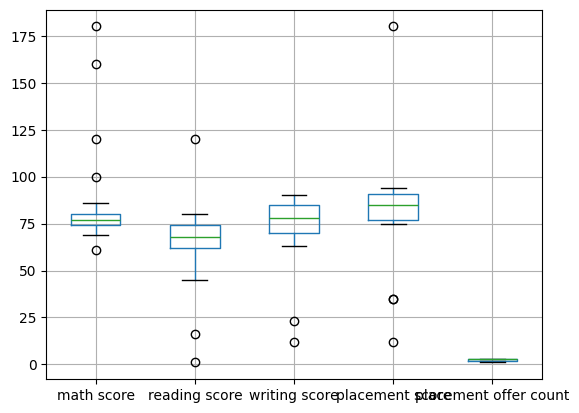

In [59]:
# Lets Detect Outliers
cols = ['math score','reading score','writing score','placement score','placement offer count']
df_outliers.boxplot(cols)
plt.show()

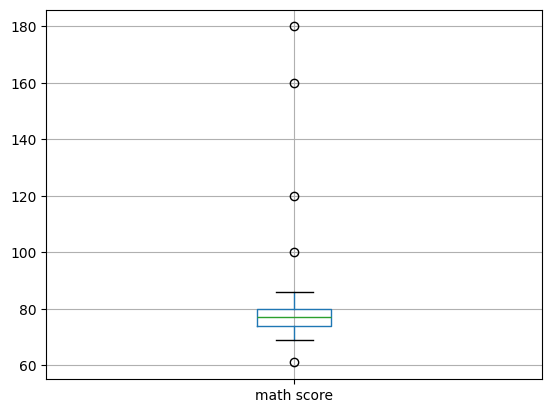

In [60]:
# Box Plot for Single Columns to Get the View in 
df_outliers[['math score']].boxplot()
plt.show()

In [61]:
# To Print the Outliers in Dataset we can use numpy
# This it will return array of index (rows nums) where the condition satisfies! 
print(np.where(df_outliers['reading score'] < 10))

(array([14]),)


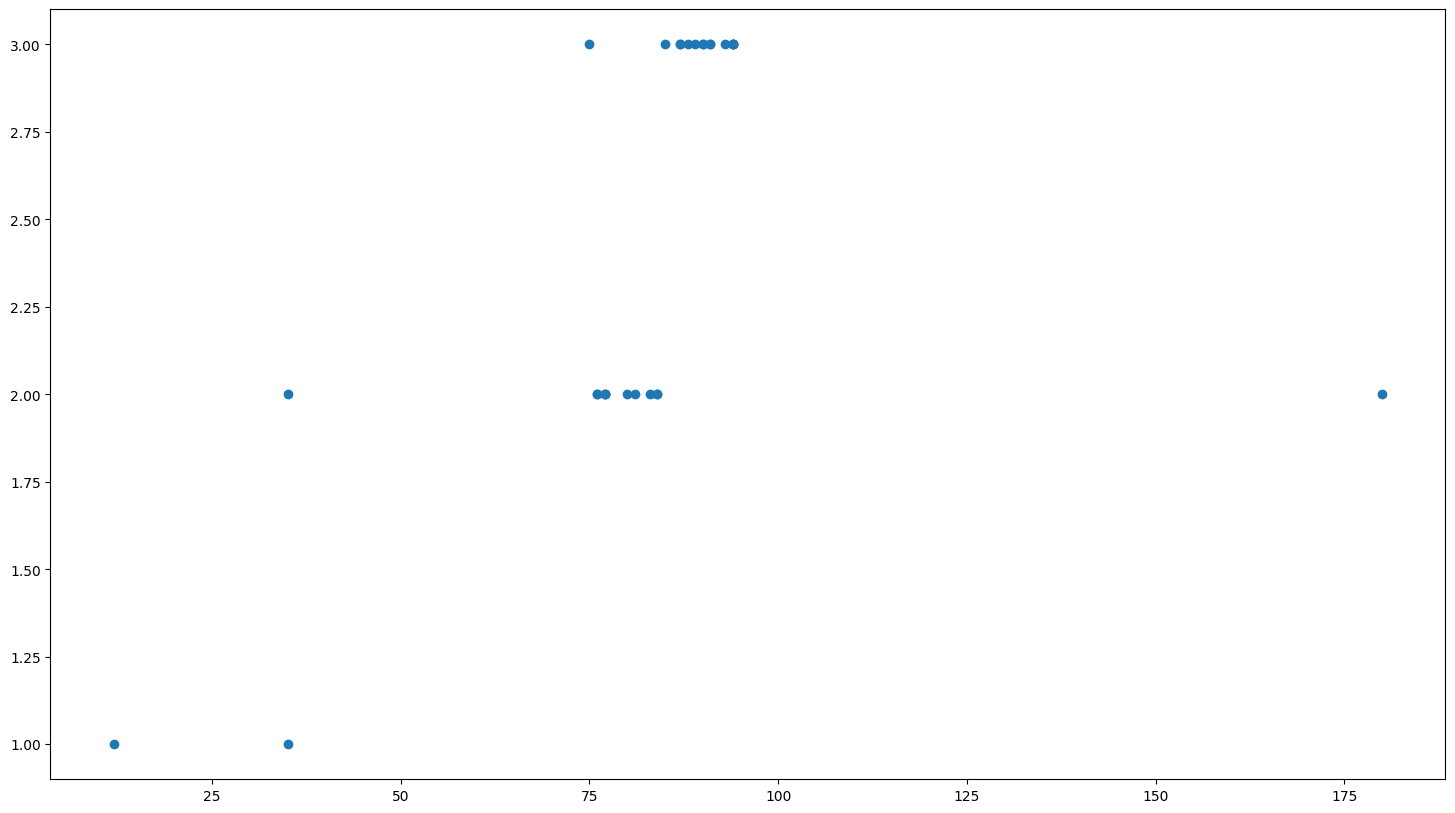

In [62]:
# Scatter Plot
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df_outliers['placement score'], df_outliers['placement offer count'])
plt.show()

In [63]:
# Now we can print outliers
print(np.where((df_outliers['placement offer count']> 3)))

(array([], dtype=int64),)


In [64]:
print(np.where((df_outliers['placement score']> 100)))

(array([11]),)


In [65]:
# This gives 
from scipy import stats
z = np.abs(stats.zscore(df_outliers['math score']))
print(z)

[0.17564553 0.5282877  0.21482799 0.92011234 0.25401045 0.44992277
 0.29319292 0.41074031 0.33237538 0.37155785 2.95895157 0.21482799
 0.17564553 0.25401045 0.37155785 0.25401045 0.05944926 0.17564553
 0.37155785 0.0972806  0.60665263 0.60800375 0.48910524 0.41074031
 0.37155785 3.74260085 0.48910524 0.5282877  1.39165302]


In [66]:
# Now Lets get outliers using Inter Quantile Range
sorted_rscore = sorted(df_outliers['reading score'])
sorted_rscore

[1,
 16,
 45,
 60,
 60,
 61,
 62,
 62,
 62,
 65,
 65,
 65,
 67,
 67,
 68,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 77,
 77,
 77,
 78,
 79,
 80,
 120]

In [67]:
q1 = np.percentile(sorted_rscore, 25) # Calculated Quartile 1
q3 = np.percentile(sorted_rscore, 75) # Calculated Quartile 3
print(q1,q3)

62.0 74.0


In [68]:
# Calculate IQR
IQR = q3 - q1

# Calculate Lower and Upper Bound
lwr_bound = q1 - (1.5 * IQR)
upr_bound = q3 + (1.5 * IQR)

print(lwr_bound, upr_bound)

44.0 92.0


In [69]:
r_outliers = []

# Search in the sorted rs_scores, use upper and lower bounds for this!
rscores = df_outliers['reading score']

for i in range(len(rscores)):
    if ( rscores[i] < lwr_bound or rscores[i] > upr_bound):
        r_outliers.append(i)

print(r_outliers)

[2, 14, 26]


In [70]:
# Create new df for trying out new trimming
new_df_outliers = df_outliers.copy()

In [71]:
# we remove the outliers from the dataset

for i in r_outliers:
    new_df_outliers.drop(i, inplace=True)
new_df_outliers


,math score,reading score,writing score,placement score,placement offer count,club join year
0,80,68,70,89,3,2019
1,71,61,85,91,3,2019
3,61,77,74,76,2,2020
4,78,71,67,90,3,2019
5,73,68,90,80,2,2019
6,77,62,70,35,2,2020
7,74,45,80,12,1,2019
8,76,60,79,77,2,2020
9,75,65,85,87,3,2018
10,160,67,12,83,2,2020


In [73]:
df

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,female,72,72,74.0,78.0,1,Pune
1,female,69,90,88.0,NaN,2,na
2,female,90,95,93.0,74.0,2,Nashik
3,male,47,57,NaN,78.0,1,Na
4,male,na,78,75.0,81.0,3,Pune
5,female,71,Na,78.0,70.0,4,na
6,male,12,44,52.0,12.0,2,Nashik
7,male,NaN,65,67.0,49.0,1,Pune
8,male,5,77,89.0,55.0,0,NaN


In [74]:
df_trans = new_df_outliers.copy()

In [75]:
df_trans

,math score,reading score,writing score,placement score,placement offer count,club join year
0,80,68,70,89,3,2019
1,71,61,85,91,3,2019
3,61,77,74,76,2,2020
4,78,71,67,90,3,2019
5,73,68,90,80,2,2019
6,77,62,70,35,2,2020
7,74,45,80,12,1,2019
8,76,60,79,77,2,2020
9,75,65,85,87,3,2018
10,160,67,12,83,2,2020


In [76]:
import datetime
current_year = datetime.datetime.now().year

In [80]:
# Add Duration Column
df_trans['duration'] = current_year - df_trans['club join year']

In [81]:
df_trans

,math score,reading score,writing score,placement score,placement offer count,club join year,duration
0,80,68,70,89,3,2019,7
1,71,61,85,91,3,2019,7
3,61,77,74,76,2,2020,6
4,78,71,67,90,3,2019,7
5,73,68,90,80,2,2019,7
6,77,62,70,35,2,2020,6
7,74,45,80,12,1,2019,7
8,76,60,79,77,2,2020,6
9,75,65,85,87,3,2018,8
10,160,67,12,83,2,2020,6


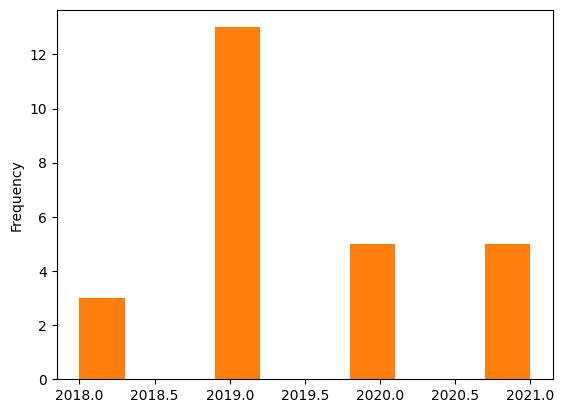

In [91]:
import matplotlib.pyplot as plt
df_trans['club join year'].plot(kind = 'hist')
plt.show()

In [87]:
df_trans['log math'] = np.log10(df_trans['math score'])

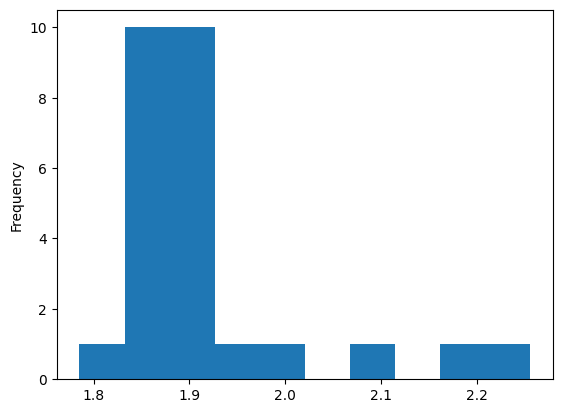

In [88]:
df_trans['log math'].plot(kind = 'hist')
plt.show()